In [1]:
import seaborn as sns

iris = sns.load_dataset('iris')

In [2]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
iris.species.value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

In [4]:
iris_AR = iris.values
iris_AR

array([[5.1, 3.5, 1.4, 0.2, 'setosa'],
       [4.9, 3.0, 1.4, 0.2, 'setosa'],
       [4.7, 3.2, 1.3, 0.2, 'setosa'],
       [4.6, 3.1, 1.5, 0.2, 'setosa'],
       [5.0, 3.6, 1.4, 0.2, 'setosa'],
       [5.4, 3.9, 1.7, 0.4, 'setosa'],
       [4.6, 3.4, 1.4, 0.3, 'setosa'],
       [5.0, 3.4, 1.5, 0.2, 'setosa'],
       [4.4, 2.9, 1.4, 0.2, 'setosa'],
       [4.9, 3.1, 1.5, 0.1, 'setosa'],
       [5.4, 3.7, 1.5, 0.2, 'setosa'],
       [4.8, 3.4, 1.6, 0.2, 'setosa'],
       [4.8, 3.0, 1.4, 0.1, 'setosa'],
       [4.3, 3.0, 1.1, 0.1, 'setosa'],
       [5.8, 4.0, 1.2, 0.2, 'setosa'],
       [5.7, 4.4, 1.5, 0.4, 'setosa'],
       [5.4, 3.9, 1.3, 0.4, 'setosa'],
       [5.1, 3.5, 1.4, 0.3, 'setosa'],
       [5.7, 3.8, 1.7, 0.3, 'setosa'],
       [5.1, 3.8, 1.5, 0.3, 'setosa'],
       [5.4, 3.4, 1.7, 0.2, 'setosa'],
       [5.1, 3.7, 1.5, 0.4, 'setosa'],
       [4.6, 3.6, 1.0, 0.2, 'setosa'],
       [5.1, 3.3, 1.7, 0.5, 'setosa'],
       [4.8, 3.4, 1.9, 0.2, 'setosa'],
       [5.0, 3.0, 1.6, 0.

In [5]:
AR_X = iris_AR[:,:4].astype(float)
AR_y = iris_AR[:,4]

AR_X.shape, AR_y.shape

((150, 4), (150,))

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
AR_yLBE = encoder.fit_transform(AR_y)

AR_yLBE
                                

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
import tensorflow as tf

AR_yOHE = tf.keras.utils.to_categorical(AR_yLBE)
AR_yOHE[0]

array([1., 0., 0.], dtype=float32)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(AR_X, AR_yOHE, test_size = 0.3, random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105, 3), (45, 3))

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [30]:
Model_iris = models.Sequential()

Model_iris.add(layers.Dense(6, activation='tanh', input_shape=(4,)))
#Model_iris.add(layers.Dense(8, activation='tanh'))
Model_iris.add(layers.Dense(3, activation='softmax'))

In [31]:
Model_iris.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 6)                 30        
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 21        
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


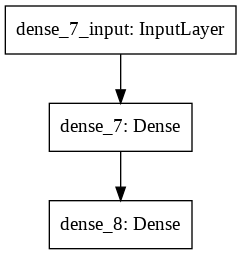

In [32]:
from tensorflow.keras import utils
utils.plot_model(Model_iris)

In [33]:
Model_iris.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['Accuracy'])

In [34]:
History=Model_iris.fit(X_train, y_train,
                       epochs = 500,
                       batch_size=7,
                       validation_data=(X_test, y_test))

Epoch 1/500
15/15 [==============================] - 1s 15ms/step - loss: 1.2637 - accuracy: 0.0000e+00 - val_loss: 1.2424 - val_accuracy: 0.0000e+00
Epoch 2/500
15/15 [==============================] - 0s 4ms/step - loss: 1.1748 - accuracy: 0.0000e+00 - val_loss: 1.1493 - val_accuracy: 0.0000e+00
Epoch 3/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0430 - accuracy: 0.0000e+00 - val_loss: 1.0699 - val_accuracy: 0.0000e+00
Epoch 4/500
15/15 [==============================] - 0s 4ms/step - loss: 1.0054 - accuracy: 0.0000e+00 - val_loss: 0.9973 - val_accuracy: 0.0000e+00
Epoch 5/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9531 - accuracy: 0.0000e+00 - val_loss: 0.9369 - val_accuracy: 0.0000e+00
Epoch 6/500
15/15 [==============================] - 0s 4ms/step - loss: 0.9126 - accuracy: 0.0000e+00 - val_loss: 0.8887 - val_accuracy: 0.0000e+00
Epoch 7/500
15/15 [==============================] - 0s 4ms/step - loss: 0.8924 - accuracy: 0.0000e+00 - 

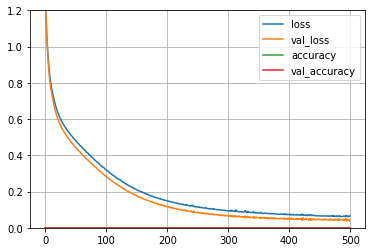

In [36]:
import matplotlib.pyplot as plt

plt.ylim(0, 1.2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [37]:
loss, accuracy = Model_iris.evaluate(X_test, y_test)

2/2 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.0000e+00


In [42]:
import numpy as np
np.set_printoptions(suppress=True, precision=5)
Model_iris.predict(X_test)

array([[0.99823, 0.00177, 0.     ],
       [0.99753, 0.00247, 0.     ],
       [0.00141, 0.99832, 0.00027],
       [0.00001, 0.00068, 0.99931],
       [0.9984 , 0.0016 , 0.     ],
       [0.00066, 0.99883, 0.00051],
       [0.00009, 0.01264, 0.98728],
       [0.99848, 0.00152, 0.     ],
       [0.00002, 0.00251, 0.99747],
       [0.99814, 0.00186, 0.     ],
       [0.00142, 0.89764, 0.10094],
       [0.00005, 0.00698, 0.99296],
       [0.00085, 0.99279, 0.00636],
       [0.99854, 0.00146, 0.     ],
       [0.9984 , 0.0016 , 0.     ],
       [0.00096, 0.98951, 0.00953],
       [0.00118, 0.96754, 0.03129],
       [0.99827, 0.00173, 0.     ],
       [0.00078, 0.99566, 0.00356],
       [0.99844, 0.00156, 0.     ],
       [0.99815, 0.00185, 0.     ],
       [0.99818, 0.00182, 0.     ],
       [0.00003, 0.00322, 0.99675],
       [0.99828, 0.00172, 0.     ],
       [0.00028, 0.0595 , 0.94022],
       [0.00024, 0.04698, 0.95278],
       [0.99843, 0.00157, 0.     ],
       [0.00109, 0.97867, 0.

In [39]:
y_hat = Model_iris.predict_classes(X_test)
y_hat

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [40]:
np.argmax(Model_iris.predict(X_test), axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [43]:
y = np.argmax(y_test, axis=1)
y

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [44]:
np.argmax(y_test, axis=1)

array([0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       2, 0, 2, 2, 0, 1, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 1, 2, 0, 2, 2,
       2])

In [48]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y, y_hat)

array([[17,  0,  0],
       [ 0, 14,  0],
       [ 0,  1, 13]])

In [49]:
print(classification_report(y, y_hat,
                            target_names =['setosa', 'virginica','versicolor']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
   virginica       0.93      1.00      0.97        14
  versicolor       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

